## Updated Alpha Vantage and Pandas Class Project

In [27]:
# Variable Definitions 

# Exercise 1 - change the requested information below
# 
# Note that NOT all items need to be changed - see comments below

your_name=" MikePando"  # put your name here

api_key=""  # put your API key here

company_name="NVIDIA"    # put the name of the company whose stock you are going to plot

stock_symbol="NVDA"         # put the stock symbol you want to look up
                            # for example Amazon is AMZN, Microsoft is MSFT

url="https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol="+stock_symbol
url=url+"&interval=5min&datatype=csv&apikey="+api_key   # you do NOT need to change this

project_filename="av_project.html"   # filename to be used for HTML file, you do NOT need to change this

# run this cell

In [28]:
# We are going to be generating an HTML page containing hourly plots of closing prices
# 
# The name of the HTML file is stored in the project_filename variable (defined above)
#
# First we need to open the file - we get back a handle that we can
# use to write data to the file

def startWebPage(project_filename,company_name,your_name):
    handle=open(project_filename,"w")

    # Now we will write out the first few line of HTML for a web page to the file
    handle.write("<!DOCTYPE html><html>\n")
    handle.write("<head><title>Final Project</title></head>\n")
    handle.write("<body>\n")
    handle.write("<center>\n")
    handle.write("<h2>"+company_name+":Intra-Day Closing Values</h2>\n")
    # the following img tag will show a stock-related image on our web page - feel free to replace the URL if you wish
    handle.write("<img src='https://www.kiplinger.com/slideshow/investing/T052-S001-10-small-cap-growth-stocks-to-buy-now/images/intro.jpg' height=180, width=800>\n")
    handle.write("<h3>By"+your_name+"</h3>\n")
    handle.write("</center>\n")

    return handle

In [29]:
# Exercise #2
#
# Test your function by running the following code.

handle=startWebPage(project_filename,company_name,your_name)
handle.close()

# Once run, the above code should create a file named project.html in
# the directory that contains this notebook
# 
# Try to open that file in a browser - either by double clicking on the 
# project.html icon in the directory or pressing CTRL-o (note this is the letter O - for open)
# and then browsing to find the project.html file
#
# Once loaded into the web browser you should see a web page with just a few lines of text
# and an image.

In [4]:
# We are going to use Pandas for this lab so we need to import it

import pandas as pd     # pd will be an alias for pandas

# run this cell

In [30]:
# Read the CSV file returned by the given URL - this returns a Pandas dataframe

data=pd.read_csv(url)

# run this cell

In [31]:
# After issuing the following command you should
# see the first five records of the data table (dataframe)

data.head()

# run this cell

,timestamp,open,high,low,close,volume
0,2019-04-30 16:00:00,180.69,181.20,180.58,181.09,433898
1,2019-04-30 15:55:00,180.80,180.88,180.50,180.68,128099
2,2019-04-30 15:50:00,180.72,180.85,180.59,180.82,127573
3,2019-04-30 15:45:00,181.09,181.11,180.62,180.72,104378
4,2019-04-30 15:40:00,181.32,181.34,181.00,181.09,82144


In [32]:
# Exercise #3 

# Dataframes can be saved to CSV files - which can also be read by Excel
# Lets save our data in a csv file using the dataframe to_csv method

data.to_csv("stock_project.csv")

# Then open the file in Excel - it is located in the same folder as this jupyter notebook

In [33]:
# Convert the timestamp from string to Pandas datetime type
# this will allow us to extract the various parts of the date - day, hour, minutes
# 
data.timestamp=pd.to_datetime(data.timestamp)

# run this cell

In [34]:
# Place the hour in its own column
data["hour"]=data.timestamp.dt.hour

# run this cell

In [35]:
# Exercise 4:
#
# Write and then run the code needed to extract the minute from each timestamp
# The minute should be stored in its own column named "minute" 

# The code is very similar to the above code used to store the hour

data["minute"]=data.timestamp.dt.minute

In [36]:
# Make sure the two extra columns (hour and minute) have been created -
# they should appear when you execute the following command
# which will display the first five rows
data.head()

# run this cell

,timestamp,open,high,low,close,volume,hour,minute
0,2019-04-30 16:00:00,180.69,181.20,180.58,181.09,433898,16,0
1,2019-04-30 15:55:00,180.80,180.88,180.50,180.68,128099,15,55
2,2019-04-30 15:50:00,180.72,180.85,180.59,180.82,127573,15,50
3,2019-04-30 15:45:00,181.09,181.11,180.62,180.72,104378,15,45
4,2019-04-30 15:40:00,181.32,181.34,181.00,181.09,82144,15,40


In [37]:
# Since your dataset represents a 24 hour time series it
# is possible that two days worth of data are stored in the table

# A simple way to check is to ask for the max and min of the timestamp
# column

minDate=data.timestamp.min()
maxDate=data.timestamp.max()
print("The minDate is",minDate)
print("The maxDate is",maxDate)

# run this cell

The minDate is 2019-04-29 14:15:00
The maxDate is 2019-04-30 16:00:00


In [38]:
# Even though we have a most two dates in our table
# lets create a list of those dates
# so that we can eventually use a for-loop
# to execute the same code for both dates

if minDate.day!=maxDate.day:
    daysList=[minDate,maxDate]    # two days in time series
else:
    daysList=[minDate]    # only one day in the time series

print(daysList)

# run this cell

[Timestamp('2019-04-29 14:15:00'), Timestamp('2019-04-30 16:00:00')]


In [39]:
# We can now write the for-loop that will 
# first extract and then process the data for each day in daysList

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]  # select data for day specified by i
    print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))

# run this cell

Data for 4/29/2019
Data for 4/30/2019


In [40]:
# Exercise 5:

# For each day we need to find the first
# and last hour of trading data - 
# since we are plotting each hour of trading data.
#
# At the bottom of the code body of the for-loop
# define two new variables:
#
# The first variable, named startHour should 
# contain the minimum hour in the oneDayData.hour column.
# 
# The second variable, named endHour should
# contain the maximum hour in the oneDayData.hour column.
#
# You can also print the two variables to make sure
# you are getting the expected data.
#
# Remember that the hours will be represented using the 24 hour
# representation - so 14 represents 2PM.

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    print(startHour,endHour)


Data for 4/29/2019
14 16
Data for 4/30/2019
9 16


In [41]:
# Exercise 6:

# We now know the start hour of the data and end hour of the data (for each day)
#
# We will use another for-loop to iterate over the hours of data we have (for each day)
#
# For example for one day we may have trading data for hour 13 (1PM) to hour 16 (4PM).
# we want our second (inner) for loop to go from 13 to 16 (but not include 16 - we will
# plot data at 5 minute intervals for hour 15 to 16 - but we have no data after hour 16)
# 
# INSIDE (and indented under) the body of the for-loop add another for-loop indexed on letter j.
# This for loop should generate all the numbers between startHour and endHour.
# The range function will be very helpful here.
# 
# You can add a print statement inside the second for-loop to make sure the
# correct numbers are being generated. Remember this print statement
# will be indented under the SECOND (inner) for-loop.
# 

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    print(startHour,endHour)
    for x in range(startHour,endHour):
        print(x)



Data for 4/29/2019
14 16
14
15
Data for 4/30/2019
9 16
9
10
11
12
13
14
15


In [42]:
# Exercise 7:

# We want to plot the 5 minute interval closing data for each hour.
# Our second for-loop is generating each hour that we will plot.
#
# Therefore we need to extract the 5 minute trading data for the particular hour
# that is represented by j (the index of the second for-loop)
# 
# We can accomplish this with the following line
# oneHourData=oneDayData[oneDayData.hour==j]
# 
# Notice that the above code assigns the extracted data
# to a new table (dataframe) named oneHourData
#
# Add the above oneHourData assignment indented INSIDE the SECOND FOR LOOP
#
# On the line following the assignment to oneHourData add a 
# print statement that prints the oneHourData table,
# so that you can see some of the data in that table
# This print statement should also be indented INSIDE the SECOND FOR LOOP
# 
# If you wish you can comment out the other previous print statements

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    #print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    #print(startHour,endHour)
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        print(oneHourData)

             timestamp    open      high     low   close  volume  hour  minute
91 2019-04-29 14:55:00  179.77  179.7800  179.64  179.67   41737    14      55
92 2019-04-29 14:50:00  179.93  179.9700  179.75  179.77   45770    14      50
93 2019-04-29 14:45:00  179.86  179.9600  179.75  179.96   50587    14      45
94 2019-04-29 14:40:00  179.94  180.0300  179.84  179.84   31188    14      40
95 2019-04-29 14:35:00  179.95  180.0100  179.91  179.95   23249    14      35
96 2019-04-29 14:30:00  179.97  180.1341  179.81  179.94   43361    14      30
97 2019-04-29 14:25:00  179.99  180.1600  179.88  179.98   62740    14      25
98 2019-04-29 14:20:00  179.92  180.0500  179.89  179.98   42461    14      20
99 2019-04-29 14:15:00  179.99  180.0500  179.87  179.89   58169    14      15
             timestamp      open      high       low     close  volume  hour  \
79 2019-04-29 15:55:00  179.3200  179.3200  179.0200  179.1200   99606    15   
80 2019-04-29 15:50:00  179.3900  179.4400  179.20

In [43]:
# Exercise 8:

# One way to easily create a plot is to extract
# the two columns that you wish to plot and assign one
# of them as the index - the index will become the x-axis of the plot
# 
# First we need to extract the two columns
# 
# Indented under the second for-loop add the code
# to extract the two columns named "minute" and "close"
# from the oneHourData table (dataframe).
# 
# The resulting table should be assigned to the variable name plotData
# We did this in class - you will need put "minute" and "close" into a list
# So your added code will start look similar to this following
# plotData=oneHourData[# add your code here]
#
# You can comment out the print statement above the last plotData statement
# and add another print statement after the plotData assignment
# that displays the head of plotData.

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    #print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    #print(startHour,endHour)
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        #print(oneHourData)
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        print(plotData.head())


    minute   close
91      55  179.67
92      50  179.77
93      45  179.96
94      40  179.84
95      35  179.95
    minute     close
79      55  179.1200
80      50  179.3146
81      45  179.4107
82      40  179.5000
83      35  179.6000
    minute     close
73      55  179.0500
74      50  179.5900
75      45  179.4300
76      40  178.8324
77      35  179.0300
    minute   close
61      55  180.64
62      50  180.91
63      45  180.77
64      40  180.49
65      35  180.89
    minute     close
49      55  180.6600
50      50  180.6338
51      45  180.3600
52      40  179.8110
53      35  179.7200
    minute     close
37      55  180.3664
38      50  180.3300
39      45  180.7040
40      40  180.6100
41      35  180.5800
    minute     close
25      55  181.1700
26      50  181.3654
27      45  181.0200
28      40  180.8300
29      35  180.7800
    minute     close
13      55  180.9616
14      50  181.4100
15      45  181.3600
16      40  181.5070
17      35  181.4200
   minute   clos

In [44]:
# Exercise 9:

# We need to make the minute column the index 
# and then sort the index so that we plot sorted numbers on the x-axis
# 
# Add the following code indented under the SECOND FOR-LOOP
# Note that the set_index and sort_index methods generate
# copies of the column so we just re-assign it to plotData
# as shown below.
#
#       plotData=plotData.set_index("minute")
#       plotData=plotData.sort_index()


for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    #print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    #print(startHour,endHour)
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        #print(oneHourData)
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        plotData=plotData.set_index("minute")
        plotData=plotData.sort_index()
        print(plotData.head())

         close
minute        
15      179.89
20      179.98
25      179.98
30      179.94
35      179.95
           close
minute          
0       179.6782
5       179.5400
10      179.5657
15      179.4700
20      179.3680
           close
minute          
35      179.0300
40      178.8324
45      179.4300
50      179.5900
55      179.0500
           close
minute          
0       179.3550
5       179.8900
10      180.1950
15      180.8727
20      181.0000
           close
minute          
0       180.3339
5       179.8000
10      179.4400
15      179.4200
20      179.6000
           close
minute          
0       180.4700
5       180.3150
10      180.4800
15      181.0175
20      181.0816
           close
minute          
0       180.5700
5       180.8600
10      180.7885
15      180.9600
20      180.9910
         close
minute        
0       181.61
5       181.72
10      181.71
15      181.79
20      181.86
          close
minute         
0       180.840
5       180.779
10      181.

In [45]:
# In order to see the plots within a jupyter notebook
# execute this cell - DO NOT ADD THIS CODE TO YOUR FOR-LOOP - it is not python code
%matplotlib inline

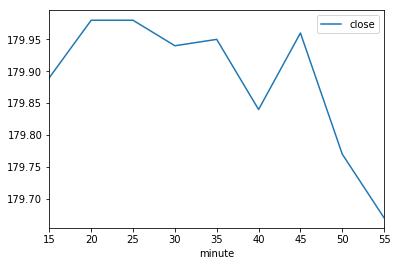

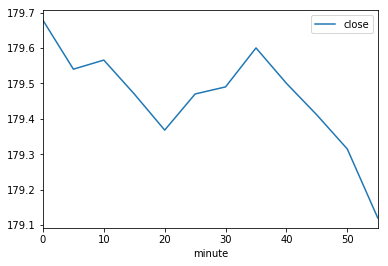

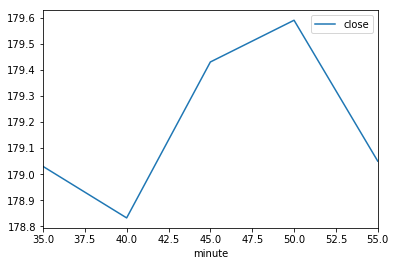

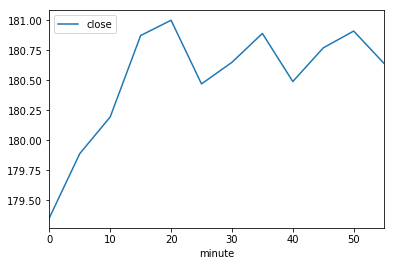

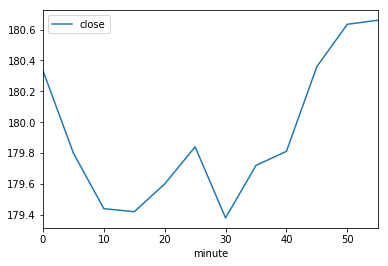

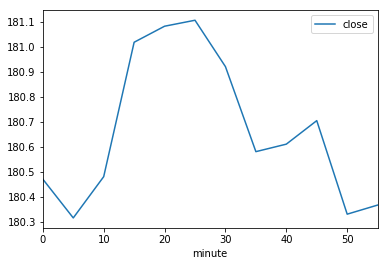

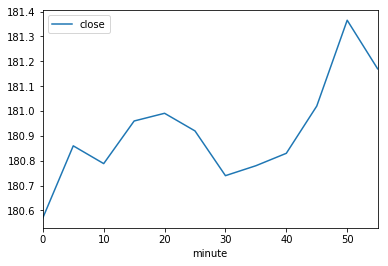

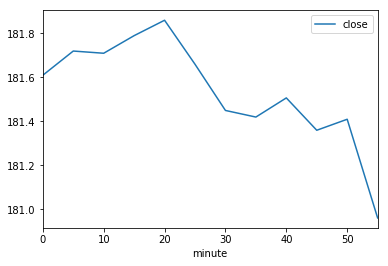

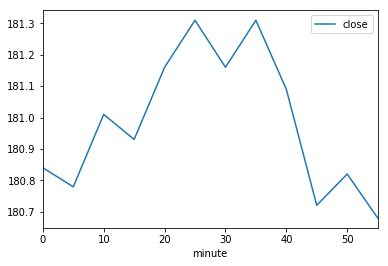

In [46]:
# Exercise 10:

# You can comment out the last print statement
# Right below the print statement add the statement
# plotData.plot()
#
# When you execute this cell you should see the plots

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    #print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    #print(startHour,endHour)
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        #print(oneHourData)
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        plotData=plotData.set_index("minute")
        plotData=plotData.sort_index()
        #print(plotData.head())
        plotData.plot()

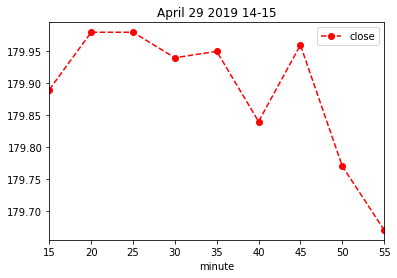

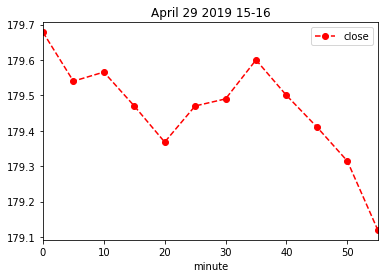

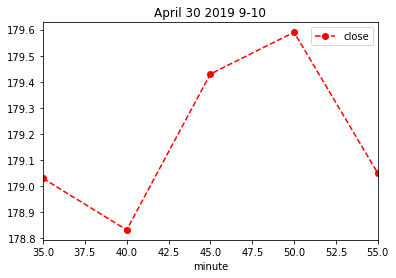

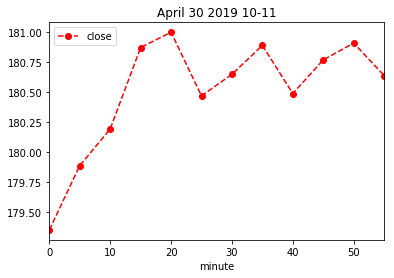

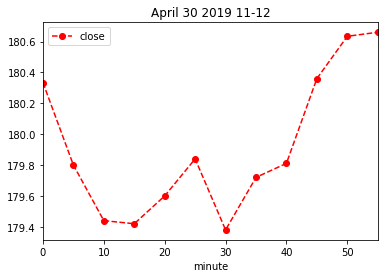

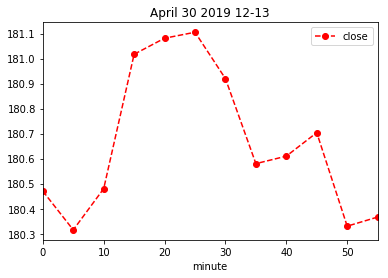

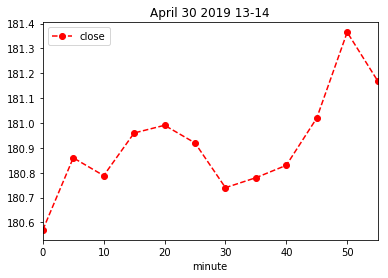

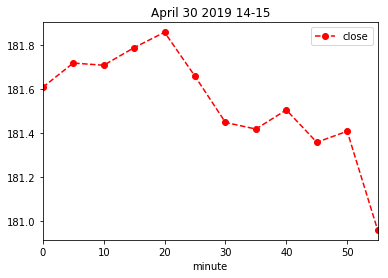

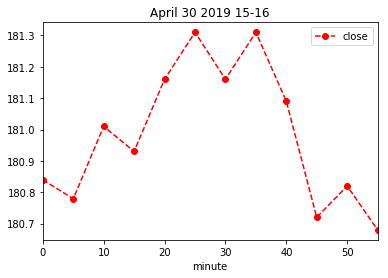

In [47]:
# Exercise 11:

# Arguments can be named - that is
# when you pass in the arguments you can pass them in any order
# as long as your specify what they are.
#
# Replace the plotData.plot() command with the following two lines
#
#        plotTitle=str(i.month_name())+" "+str(i.day)+" "+str(i.year)+" "+str(j)+"-"+str(j+1)
#        plotData.plot(color="red",linestyle="dashed",marker="o", title=plotTitle)
#
# The first line generates an plot title for the plot, and the second added line performs
# the plot with the specified arguments.


for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    #print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    #print(startHour,endHour)
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        #print(oneHourData)
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        plotData=plotData.set_index("minute")
        plotData=plotData.sort_index()
        #print(plotData.head())
        plotTitle=str(i.month_name())+" "+str(i.day)+" "+str(i.year)+" "+str(j)+"-"+str(j+1)
        plotData.plot(color="red",linestyle="dashed",marker="o", title=plotTitle)

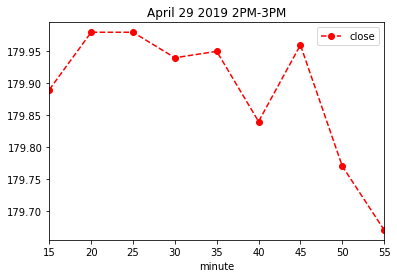

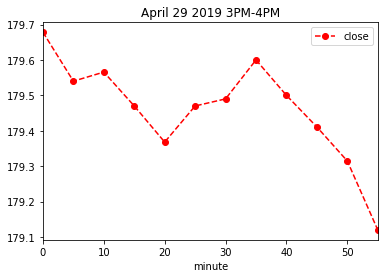

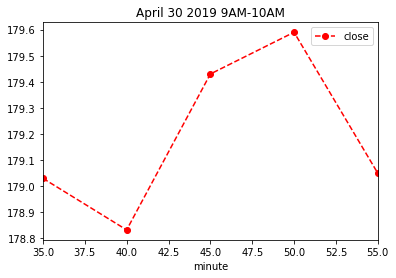

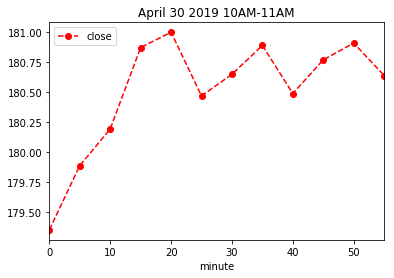

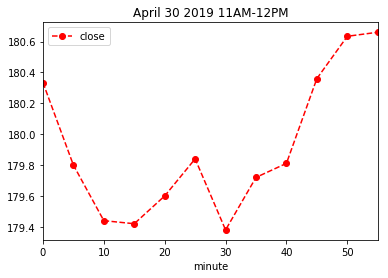

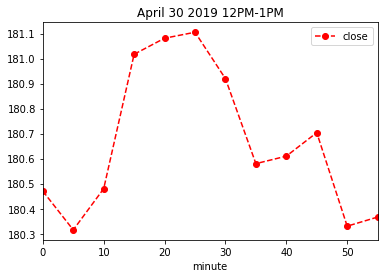

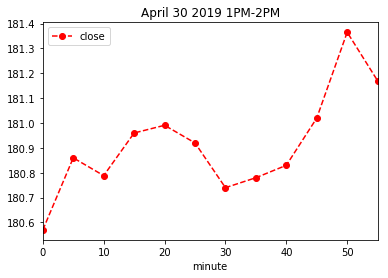

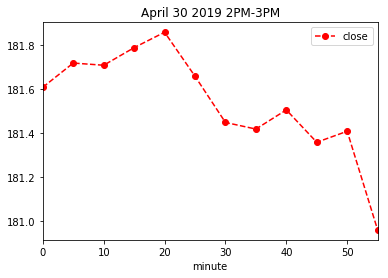

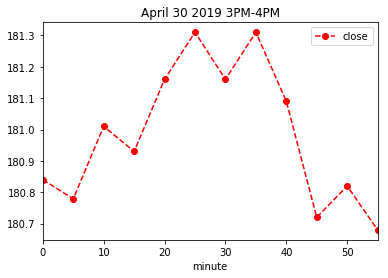

In [48]:
# Exercise 12:

# If you look at the plot titles the hours are still in 24 hour time.
#
# It would be nicer to label them with 12 hour time - using AM and PM 
# For example hour 14 is 2PM and hour 11 is 11AM.
#
# We will need to modify the last two entries of the plotTitle variable
#
# Using an if statement we can determine the appropriate labels for the time
#            

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    #print("Data for "+str(i.month)+"/"+str(i.day)+"/"+str(i.year))
    #print(startHour,endHour)
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        #print(oneHourData)
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        plotData=plotData.set_index("minute")
        plotData=plotData.sort_index()
        #print(plotData.head())
        #plotTitle=str(i.month)+" "+str(i.day)+" "+str(i.year)+" "+str(j)+"-"+str(j+1)
        if j<11:
            leftLabel=str(j)+"AM"
            rightLabel=str(j+1)+"AM"
        elif j==11:
            leftLabel="11AM"
            rightLabel="12PM"
        elif j==12:
            leftLabel="12PM"
            rightLabel="1PM"
        else:
            leftLabel=str(j-12)+"PM"
            rightLabel=str(j+1-12)+"PM"  
        plotTitle=str(i.month_name())+" "+str(i.day)+" "+str(i.year)+" "+leftLabel+"-"+rightLabel
        plotData.plot(color="red",linestyle="dashed",marker="o", title=plotTitle)

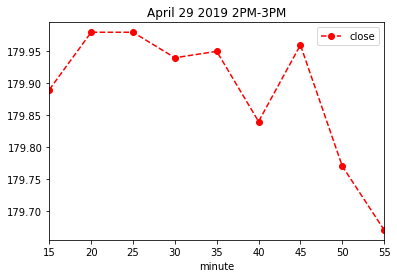

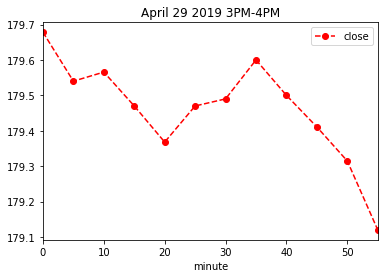

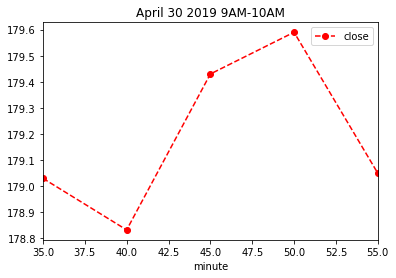

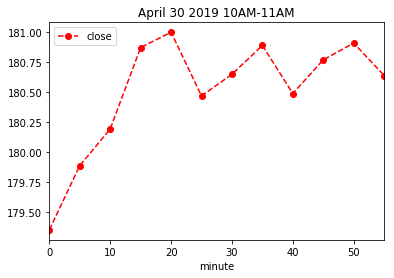

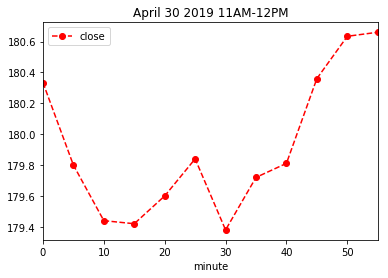

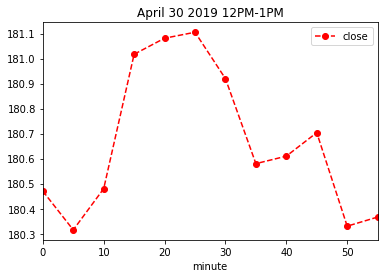

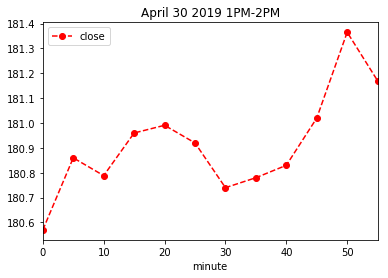

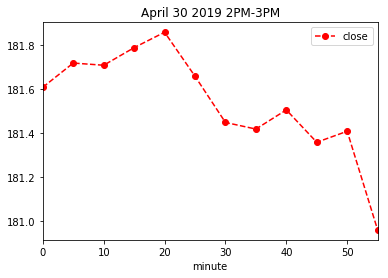

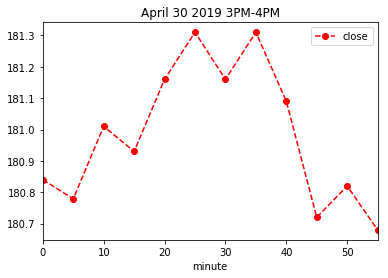

In [49]:
# Exercise 13:

# Since we are building a web page we
# need to save the plots to files - these files will be read by the web browser
# 
# Replace the plotData.plot line with the following two lines that will save the plot to a file
#
#        figureFileName="plot_"+str(i.day)+"_"+str(j)+".png"
#        plotData.plot(color="red",linestyle="dashed",marker="o", title=plotTitle).get_figure().savefig(figureFileName)
#
# Note that the first list creates the file name to save the plot under - in this case plot_day_hour.png
# png is a graphics format - similar to GIF or JPG, this is the default format produced by the pandas plot function.
#

for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        plotData=plotData.set_index("minute")
        plotData=plotData.sort_index()
        if j<11:
            leftLabel=str(j)+"AM"
            rightLabel=str(j+1)+"AM"
        elif j==11:
            leftLabel="11AM"
            rightLabel="12PM"
        elif j==12:
            leftLabel="12PM"
            rightLabel="1PM"
        else:
            leftLabel=str(j-12)+"PM"
            rightLabel=str(j+1-12)+"PM"  
        plotTitle=str(i.month_name())+" "+str(i.day)+" "+str(i.year)+" "+leftLabel+"-"+rightLabel
        figureFileName="plot_"+str(i.day)+"_"+str(j)+".png"
        plotData.plot(color="red",linestyle="dashed",marker="o", title=plotTitle).get_figure().savefig(figureFileName)

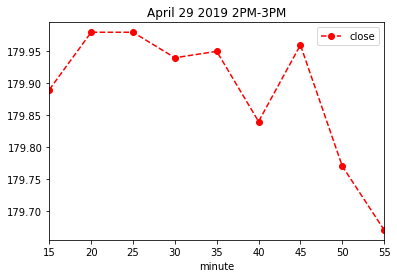

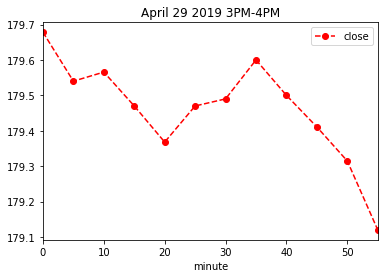

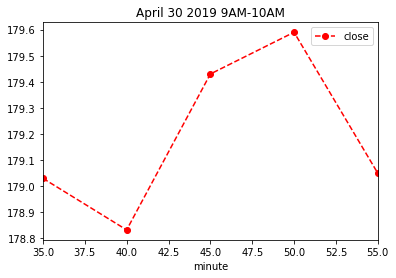

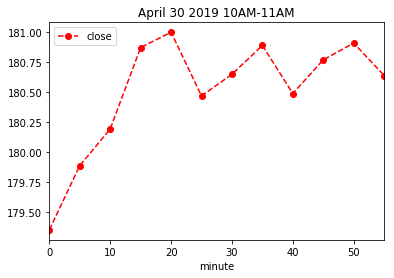

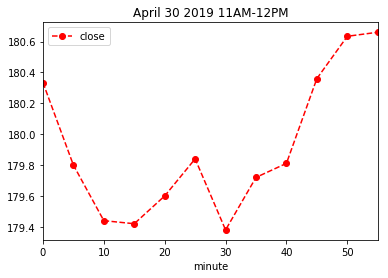

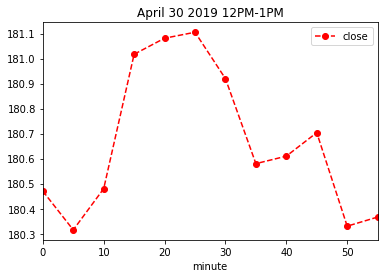

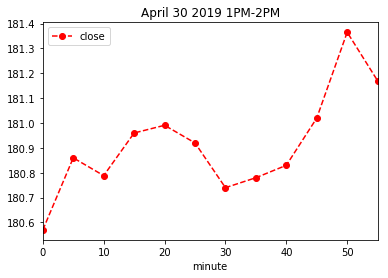

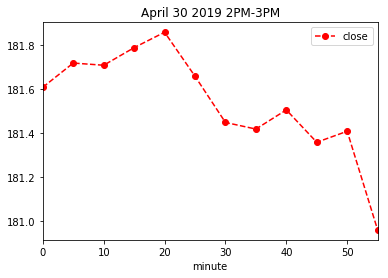

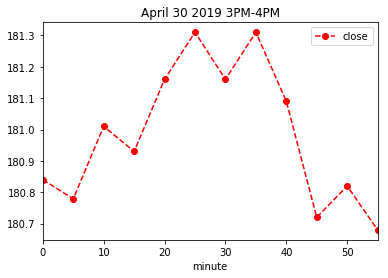

In [50]:
# Exercise 14:

# Copy the above for-loop code to this cell
#
# We are almost done - we just need to write the HTML that will tell the browser
# to read the png images.
# We also need to close the file we are writing.
# 
# Right before our first line of code (BEFORE the FIRST for-loop) add the
# following code:
#
# handle=startWebPage(project_filename,company_name,your_name)
#
# This is the same code we started the lab with - it opens and writes some HTML to the file.
#
# Right under the last line (the plot statement) add the following - indented under the second for-loop
# handle.write("<img src='"+figureFileName+"'><br>\n")
#
# The above just writes out the HTML needed to tell the browser to load our PNG plot file
# 
# Finally add the following two lines of code at the END of your program 
# THEY SHOULD NOT BE INDENTED under any loop - they will not be part of any looping code
#
# handle.write("</body></html>")
# handle.close()
# 
# The first statement just closes the HTML body and the last closes the file.
# In all programming languages files need to be closed when they are no longer being used.

handle=startWebPage(project_filename,company_name,your_name)
for i in daysList:
    oneDayData=data[data.timestamp.dt.day==i.day]
    startHour=oneDayData.hour.min()
    endHour=oneDayData.hour.max()
    for j in range(startHour,endHour):
        oneHourData=oneDayData[oneDayData.hour==j]
        minute=oneHourData.minute
        close=oneHourData.close
        plotData=oneHourData[["minute","close"]]
        plotData=plotData.set_index("minute")
        plotData=plotData.sort_index()
        if j<11:
            leftLabel=str(j)+"AM"
            rightLabel=str(j+1)+"AM"
        elif j==11:
            leftLabel="11AM"
            rightLabel="12PM"
        elif j==12:
            leftLabel="12PM"
            rightLabel="1PM"
        else:
            leftLabel=str(j-12)+"PM"
            rightLabel=str(j+1-12)+"PM"  
        plotTitle=str(i.month_name())+" "+str(i.day)+" "+str(i.year)+" "+leftLabel+"-"+rightLabel
        figureFileName="plot_"+str(i.day)+"_"+str(j)+".png"
        plotData.plot(color="red",linestyle="dashed",marker="o", title=plotTitle).get_figure().savefig(figureFileName)
        handle.write("<img src='"+figureFileName+"'><br>\n")
handle.write("</body></html>")
handle.close()


In [51]:
# After you execute the code in the above cell
# you should find a project.html file in the same
# directory (folder) that contains this code (jupyter notebook).
#
# Open that file in a web browser